<a href="https://colab.research.google.com/github/a-kash-1/Learning_OpenCV/blob/master/Detecting_rectangles_in_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage import exposure
import numpy as np
import cv2

In [0]:
image = cv2.imread('rectangle.jpg')

In [0]:
from google.colab.patches import cv2_imshow

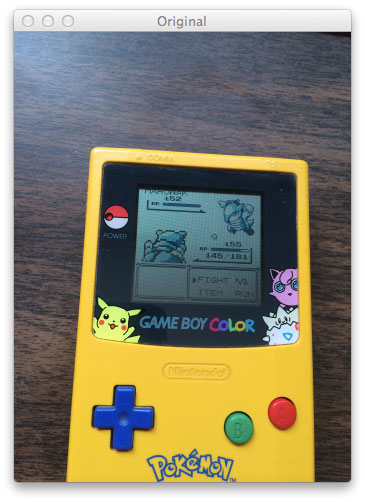

In [67]:
cv2_imshow(image)

In [0]:
# compress the image to new height, clone it and resize it
ratio = image.shape[0]/300.0
orig = image.copy()

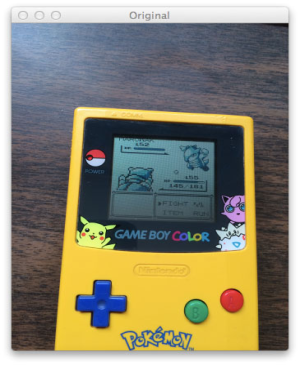

In [69]:
image = cv2.resize(orig, (300, orig.shape[1]), interpolation = cv2.INTER_AREA)
cv2_imshow(image)

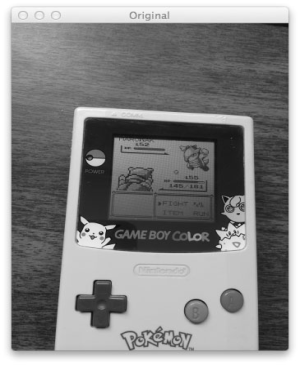

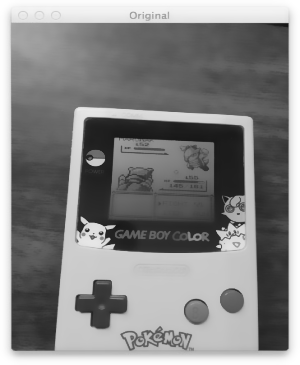

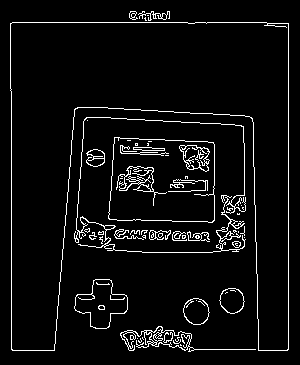

In [70]:
# convert image to grayscale.. blur it and find edges
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow(gray)
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)

In [0]:
# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
# cv2.findContours is a destructive method i.e. it modifies the original image
# It takes 3 arguments: 1. The image itself (notice a copy of it is passed)
# 2. cv2.RETR_TREE tells openCV to compute the hierarchy(relationship) between contours
# 3. Third argument saves space by compressing contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sorting cnts in descending order of contour Areas as our required rectangle is the largest in size
cnts = sorted(cnts[1], key = cv2.contourArea, reverse = True)[:10]

In [0]:
for c in cnts:
  # approximate the contours
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.015 * peri, True)

  # if our approximated contour has 4 points, then
  # we can assume that we have found our screen
  if len(approx) == 4:
    screenCnt = approx
    break

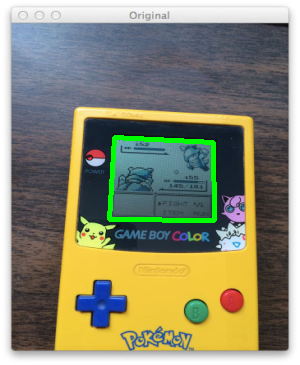

In [73]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow(image)